# Figures for blog post

This is the code for generating the figures for the blog post

> C. Boulanger, N. Creutzfeldt & J. Hendry, The Journal of Law and Society in Context: Methods ..., forthcoming (2024)

The bulk of the code has been written using GPT4.

## Fig.1: Number of articles published in a year as per DOI entry

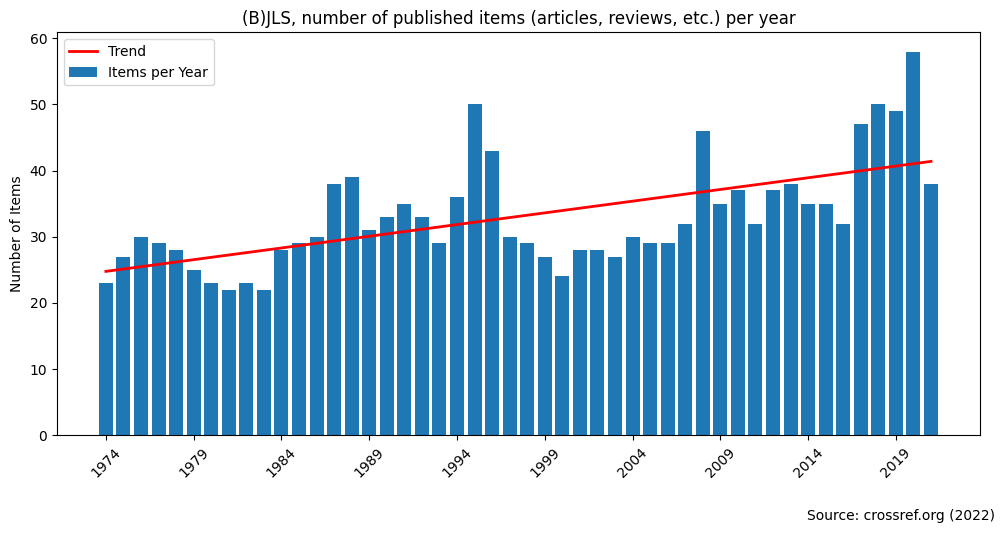

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('data/jls-doi-to-year.csv')

# Count the number of publications per year
publications_per_year = df.groupby('year').size()

# Prepare the data for plotting
x = publications_per_year.index.values  # Year values
y = publications_per_year.values  # Publication counts
numerical_x = np.arange(len(x))  # Numerical x values for plotting

# Calculate the linear regression coefficients for the trend line
slope, intercept = np.polyfit(numerical_x, y, 1)
trend_line = slope * numerical_x + intercept  # Generate trend line values

# Start plotting
plt.figure(figsize=(10, 5))

# Plot the bar chart for publications per year
plt.bar(numerical_x, y, label='Items per Year')

# Plot the trend line
plt.plot(numerical_x, trend_line, color='red', linewidth=2, label='Trend')

# Set the title and labels for the plot
plt.title('(B)JLS, number of published items (articles, reviews, etc.) per year')
plt.ylabel('Number of Items')

# Set the x-ticks to show every 5 years for better readability
plt.xticks(numerical_x[::5], x[::5], rotation=45)

# Add a legend and caption
plt.legend()
plt.figtext(1, -0.05, "Source: crossref.org (2022)", ha="right", fontsize=10)

# Adjust the layout
plt.tight_layout()
#plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save plot
plt.savefig('docs/blog-fig-01.png',dpi=300)


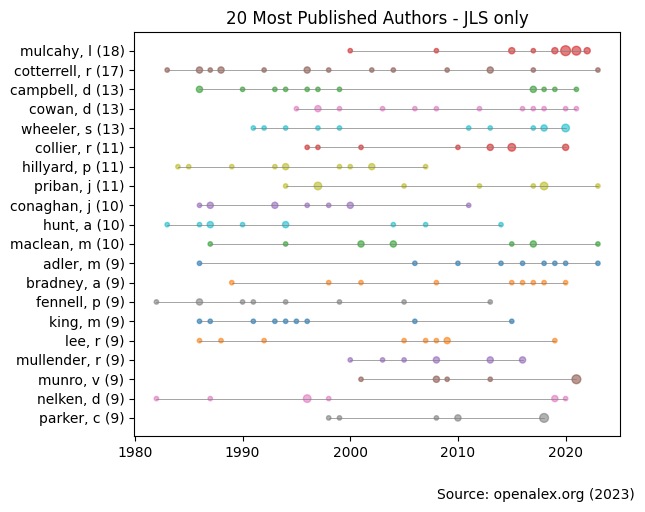

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('data/jls-author-year-openalex.csv', usecols=['author', 'year'])

# Define the function to format author names
def format_author_name(name):
    parts = name.split()
    if len(parts) == 0:  # No name given
        return ''
    last_name = parts[-1].lower()
    first_initial = parts[0][0].lower() if parts[0][0].isalpha() else ''
    return f"{last_name}, {first_initial}"

# Apply the function to format author names
df['author'] = df['author'].apply(format_author_name)

# Group by author and year and count the publications
df = df.groupby(['author', 'year']).size().reset_index(name='count')

# Find the top 20 most-published authors
top_authors = df.groupby('author')['count'].sum().nlargest(20)

# Create a mapping for the y-axis positions with the most publications at the top (0 index)
y_positions = {author: i for i, author in enumerate(top_authors.index)}

# Apply the y_positions to the 'author' column
df['y_pos'] = df['author'].map(y_positions)

# Keep only the top authors in the DataFrame
df = df[df['author'].isin(top_authors.index)]

# Create the plot
fig, ax = plt.subplots()

# Scatter plot for each author
for author, group in df.groupby('author'):
    ax.scatter(group['year'], group['y_pos'], s=group['count']*10, label=author, alpha=0.6)

# Connect the first and last publication for each author with a line
for author, group in df.groupby('author'):
    group = group.sort_values('year')
    ax.plot(group['year'], group['y_pos'], color='grey', linewidth=0.5)

# Set the y-axis to show author names with publication counts
ax.set_yticks(list(y_positions.values()))
ax.set_yticklabels([f"{author} ({top_authors[author]})" for author in top_authors.index])

# Invert the y-axis so the author with the most publications is at the top
ax.invert_yaxis()

plt.title("20 Most Published Authors - JLS only")
plt.figtext(1, -0.05, "Source: openalex.org (2023)", ha="right", fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.savefig('docs/blog-fig-02.png', bbox_inches="tight", dpi=300)